Imagine a seguinte situação: você chega numa loja de calçados e deseja comprar uma bota. Primeiramente você identifica a seção de botas na loja, que são objetos bem diferentes de meias, tênis e chinelos, por exemplo. Essa tarefa é simples para um humano. **Agrupar** conjuntos em subconjuntos é bastante intuitivo para nós, seja por características como formato, cor, função, material ou qualquer outro critério. Tudo isso se baseia no conceito de **similaridade**, e esse é o maior desafio em treinar uma máquina para aprender a agrupar. Dizer que algo é parecido, objetivamente, pode ser uma tarefa complicada. Tome o exemplo da bota. Rihanna pode escolher um sair de bota qualquer dia, entretanto elas podem ser bem diferentes...
<img src=rihanna-boots.jpg/>

E mais, mesmo que não soubéssemos o que é uma bota ou um chinelo, a diferença entre eles é tão grande que nunca como empregado de Rihanna daria a ela uma chinela no lugar de uma bota, se ela me mostrasse algo similar. 

Após essa introdução, vamos começar a entender os **algoritmos não supervisionados**. Nesse tipo de algoritmos, os dados vem sem classe, sem rótulo. Podendo ser de associação ou de agrupamento. Os de associação visam descrever regras como "se ela comprou um tênis, irá comprar meias" ou "todo paciente diabético e idoso possui problemas cardio vasculares". Já os de agrupamento tendem a identificar subconjuntos dentro dos conjuntos, formando grupos e subgrupos. Esses agrupamentos são chamamos de *clusters*, e a técnica para agrupá-los é uma *clusterização*. Como esse curso é sobre K-means, iremos focar nessa última abordagem. 

Pense no seguinte problema: dentre os pacientes que chegam na psiquiatria, quais precisam de tratamento para depressão. Nesse cenário, nós só teríamos alguns dados, como características socio-étcnica-econômicas, remédios e histórico familiar. Sem o diagnóstico prévio não temos como rodar um algoritmo de classificação. Por outro lado, ao executar um algoritmo de clusterização podemos traçar perfis psiquiátricos, cada um com suas características representativas, podendo expressar nelas os sinais para depressão.

Geralmente, a forma mais usual de encontrar semelhanças entre as características é avaliando a distância entre dois pontos no espaço dessa variável. O K-Means, do inglês k-médias, tenta encontrar um ponto médio que descreva um subconjunto, sendo este denominado de centróide. 

Os passos para a execução do k-means são:
1. Selecionar o número de grupos (clusters)
1. Inserir aleatoriamente centróides nessa mesma quantidade
1. Averiguar quais pontos são mais próximos aos centróides, associando-os
1. Recalcular o centróide como sendo a média entre os pontos mais pertos, ligados a ele anteriormente
1. Repetir os dois últimos dados até que os centróides não variem mais.

Para fins didáticos vamos primeiro brincar com o sklearn

In [312]:
import random
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import euclidean
from sklearn.datasets import load_breast_cancer, make_moons
from sklearn.cluster import KMeans

In [ ]:
cancer = load_breast_cancer(); cancer.feature_names
caracteristicas = cancer.data[:,[0,6,8]]
caracteristicas.shape

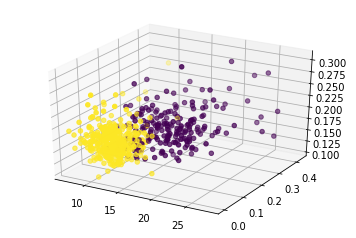

In [308]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y, z = caracteristicas[:,0], caracteristicas[:,1], caracteristicas[:,2]

ax.scatter(xs=x, ys=y, zs=z, zdir='z', c=cancer.target)

plt.show()

In [309]:
kmeans = KMeans(n_clusters=2, random_state=0)
model = kmeans.fit(caracteristicas)
model.cluster_centers_

array([[12.44571194,  0.06207506,  0.17827541],
       [19.18387324,  0.16916028,  0.18984155]])

In [310]:
cores = model.predict(caracteristicas)
print(np.mean(cores==cancer.target[::-1]))

0.45342706502636204


Mas como nem tudo são flores, o kmeans tem seu defeitos. Primeiro o número de cluster deve ser informado previamente,  isso meio que diminui a "inteligência" do algoritmo. Segundo, não funciona bem em datasets que apresentam ao menos uma das 3 condições abaixo:
- tamanhos muito diferente de cada classe
- Alta densidade 
- Dados não esféricos

Vejamos o exemplo a seguir

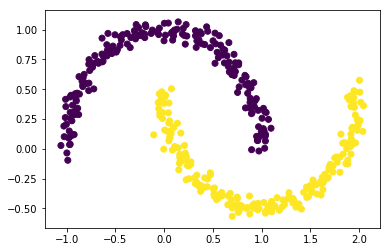

In [325]:
luas, c = make_moons(n_samples=400, noise=.05)
x, y = luas[:,0], luas[:,1]
plt.scatter(x,y,c=c)
plt.show()

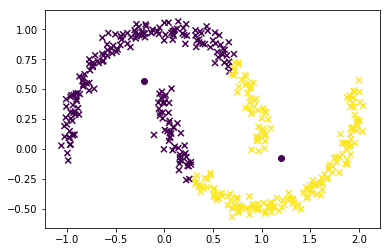

In [334]:
kluas = KMeans(n_clusters=2, random_state=0)
kmodel = kluas.fit(luas)

i=0
for centroide in kmodel.cluster_centers_:
    plt.scatter(centroide[0],centroide[1], c=i, marker='o')
plt.scatter(x,y,c=kmodel.predict(luas), marker='x')
plt.show()